Data Science Group 15 

# End To End Cricket Data Science
<center>
<img src="" width=400 />
</center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
worldcup_data = pd.read_csv('worldcup.csv')

![Loading Img](FinalImages/champions.jpeg)

In [3]:
worldcup_data.head(5) 

,date,host,stadium,match_type,team_1,team_2,team_1_score,team_2_score,winner,margin,margin_type,winning_condition,series,season,season_winner
0,30-May-19,England,The Oval,1st match,England,South Africa,311 for 8,207,England,104,runs,NaN,ICC Cricket World Cup,2019,England
1,31-May-19,England,Nottingham,2nd match,Pakistan,West Indies,105,108 for 3,West Indies,7,wickets,with 218 balls remaining,ICC Cricket World Cup,2019,England
2,01-Jun-19,England,Cardiff,3rd match,Sri Lanka,New Zealand,136,137 for 0,New Zealand,10,wickets,with 203 balls remaining,ICC Cricket World Cup,2019,England
3,01-Jun-19,England,Bristol,4th match (D/N),Afghanistan,Australia,207,209 for 3,Australia,7,wickets,with 91 balls remaining,ICC Cricket World Cup,2019,England
4,02-Jun-19,England,The Oval,5th match,Bangladesh,South Africa,330 for 6,309 for 8,Bangladesh,21,runs,NaN,ICC Cricket World Cup,2019,England


In [4]:
   worldcup_data.tail(5)

,date,host,stadium,match_type,team_1,team_2,team_1_score,team_2_score,winner,margin,margin_type,winning_condition,series,season,season_winner
449,20-Apr-07,West Indies,Super Eights,47th Match,Australia,New Zealand,348 for 6,133,Australia,215,runs,NaN,ICC World Cup,2006/07,Australia
450,21-Apr-07,West Indies,Super Eights,48th Match,West Indies,England,300,301 for 9,England,1,wicket,with 1 ball remaining,ICC World Cup,2006/07,Australia
451,24-Apr-07,West Indies,Kingston,1st Semi-Final,Sri Lanka,New Zealand,289 for 5,208,Sri Lanka,81,runs,NaN,ICC World Cup,2006/07,Australia
452,25-Apr-07,West Indies,Gros Islet,2nd Semi-Final,South Africa,Australia,149,153 for 3,Australia,7,wickets,with 111 balls remaining,ICC World Cup,2006/07,Australia
453,28-Apr-07,West Indies,Bridgetown,Final,Australia,Sri Lanka,281 for 4,215 for 8,Australia,53,runs,D/L method,ICC World Cup,2006/07,Australia


### Data Cleaning

In [5]:
df = worldcup_data

In [6]:
df['date'] = pd.to_datetime(df['date'])

/var/folders/s0/rbvmdt111zb6_2fzwpdjlgbc0000gn/T/ipykernel_7356/3532345252.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


# Sorting the data by date column 

In [7]:

df_sorted = df.sort_values(by='date')

df_sorted.reset_index(drop=True, inplace=True)

print(df_sorted)

          date     host     stadium        match_type        team_1  \
0   1975-06-07  England      Lord's         1st Match       England   
1   1975-06-07  England  Birmingham         2nd Match   New Zealand   
2   1975-06-07  England       Leeds         3rd Match     Australia   
3   1975-06-07  England  Manchester         4th Match     Sri Lanka   
4   1975-06-11  England  Nottingham         5th Match       England   
..         ...      ...         ...               ...           ...   
449 2019-07-06  England       Leeds        44th match     Sri Lanka   
450 2019-07-06  England  Manchester  45th match (D/N)  South Africa   
451 2019-07-09  England  Manchester    1st Semi-final   New Zealand   
452 2019-07-11  England  Birmingham    2nd Semi-final     Australia   
453 2019-07-14  England      Lord's             Final   New Zealand   

          team_2 team_1_score team_2_score        winner      margin  \
0          India    334 for 4    132 for 3       England         202   
1  

![Loading Gif](FinalImages/JesseWalt.gif)

### Lets begin with some actual work now 

### Calculating the winning percentages of India Vs (England, Australia, South Africa, Bangladesh, Pakistan,New Zealand, Afghanistan, Netherlands, Sri Lanka) 

### Even though our dataset comprises 20 unique teams, we are only considering the 10 current teams
                   

In [8]:
# Filtering out the teams as required and calculating the winning percentage of India against each Team
specified_teams = ["England", "Australia", "South Africa", "Bangladesh", "Pakistan", 
                   "New Zealand", "Afghanistan", "Netherlands", "Sri Lanka"]

# Filtering the dataset for matches involving India and the specified teams
india_matches = worldcup_data[(worldcup_data['team_1'] == "India") | (worldcup_data['team_2'] == "India")]
india_vs_specified = india_matches[india_matches['team_1'].isin(specified_teams) | india_matches['team_2'].isin(specified_teams)]

def calculate_winning_percentage(team_name, matches):
    total_matches = matches.shape[0]
    wins = matches['winner'].value_counts().get("India", 0)
    return (wins / total_matches) * 100 if total_matches > 0 else 0

winning_percentages = {}
for team in specified_teams:
    team_matches = india_vs_specified[(india_vs_specified['team_1'] == team) | (india_vs_specified['team_2'] == team)]
    winning_percentages[team] = calculate_winning_percentage(team, team_matches)

winning_percentages


{'England': 37.5,
 'Australia': 33.33333333333333,
 'South Africa': 40.0,
 'Bangladesh': 75.0,
 'Pakistan': 100.0,
 'New Zealand': 33.33333333333333,
 'Afghanistan': 100.0,
 'Netherlands': 100.0,
 'Sri Lanka': 44.44444444444444}

<img src="FinalImages/FlagIndia.png" width = 200>
<img src="FinalImages/FlagEngland.png" width = 200>
<img src="FinalImages/FlafAustralia.png" width = 200>
<img src="FinalImages/FlagNZ.png" width = 200>
<img src="FinalImages/FlagSL.gif" width = 200>
<img src="FinalImages/FlagZimbabwe.png" width = 200>
<img src="FinalImages/FlagWestIndies.jpg" width = 200>
<img src="FinalImages/FlagSA.jpg" width = 200>

### Data Visualization

In [9]:
winning_percentages_values = list(winning_percentages.values())

mean_winning_percentage = np.mean(winning_percentages_values)
variance_winning_percentage = np.var(winning_percentages_values)
std_dev_winning_percentage = np.std(winning_percentages_values)

mean_winning_percentage, variance_winning_percentage, std_dev_winning_percentage

(62.623456790123456, 837.0560890108216, 28.93192162665352)

Let's do some calculation for India

In [10]:
team_1_counts = df_sorted['team_1'].value_counts().get('India', 0)
team_2_counts = df_sorted['team_2'].value_counts().get('India', 0)

total_occurrences = team_1_counts + team_2_counts

print(f"Total occurrences of 'India' in team_1: {team_1_counts}")
print(f"Total occurrences of 'India' in team_2: {team_2_counts}")
print(f"Total occurrences of 'India' in both columns: {total_occurrences}")

Total occurrences of 'India' in team_1: 47
Total occurrences of 'India' in team_2: 38
Total occurrences of 'India' in both columns: 85


In [11]:
india_wins = df_sorted['winner'].value_counts().get('India', 0)
print(f"Total number of matches won by India: {india_wins}")

Total number of matches won by India: 53


In [12]:
Prob_win = india_wins / total_occurrences 
Prob_win

0.6235294117647059

In [13]:
india_vs_aus_matches = (
    ((df_sorted['team_1'] == 'India') & (df_sorted['team_2'] == 'Australia')) |
    ((df_sorted['team_1'] == 'Australia') & (df_sorted['team_2'] == 'India')))

total_india_vs_aus_matches = india_vs_aus_matches.sum()

print(f"Total number of matches where India played against Australia: {total_india_vs_aus_matches}")

Total number of matches where India played against Australia: 12


In [14]:
india_vs_aus_matches = (
    ((df_sorted['team_1'] == 'India') & (df_sorted['team_2'] == 'England')) |
    ((df_sorted['team_1'] == 'England') & (df_sorted['team_2'] == 'India')))

total_india_vs_England_matches = india_vs_aus_matches.sum()
print(f"Total number of matches where India played against England: {total_india_vs_England_matches}")

Total number of matches where India played against England: 8


In [15]:
india_vs_Pakistan_matches = (
    ((df_sorted['team_1'] == 'India') & (df_sorted['team_2'] == 'Pakistan')) |
    ((df_sorted['team_1'] == 'pakistan') & (df_sorted['team_2'] == 'India')))

total_india_vs_Pakistan_matches = india_vs_Pakistan_matches.sum()

print(f"Total number of matches where India played against Pakistan: {total_india_vs_Pakistan_matches}")

Total number of matches where India played against Pakistan: 6


In [16]:
india_vs_aus_matches = (
    ((df_sorted['team_1'] == 'India') & (df_sorted['team_2'] == 'New Zealand')) |
    ((df_sorted['team_1'] == 'New Zealand') & (df_sorted['team_2'] == 'India')))

total_india_vs_New_Zeland_matches = india_vs_aus_matches.sum()

print(f"Total number of matches where India played against New Zealand: {total_india_vs_New_Zeland_matches}")

Total number of matches where India played against New Zealand: 9


In [17]:
india_vs_aus_matches = (
    ((df_sorted['team_1'] == 'India') & (df_sorted['team_2'] == 'South Africa')) |
    ((df_sorted['team_1'] == 'South Africa') & (df_sorted['team_2'] == 'India'))
)

total_india_vs_South_Adrica_matches = india_vs_aus_matches.sum()

print(f"Total number of matches where India played against South Africa: {total_india_vs_South_Adrica_matches}")

Total number of matches where India played against South Africa: 5


In [18]:
total_all = total_india_vs_South_Adrica_matches + total_india_vs_New_Zeland_matches + total_india_vs_Pakistan_matches + total_india_vs_England_matches + total_india_vs_aus_matches
print(total_all)

40


In [19]:
india_wins_against_aus = (
    ((df_sorted['team_1'] == 'India') & (df_sorted['team_2'] == 'Australia') & (df_sorted['winner'] == 'India')) |
    ((df_sorted['team_1'] == 'Australia') & (df_sorted['team_2'] == 'India') & (df_sorted['winner'] == 'India'))
)

total_india_wins_against_aus = india_wins_against_aus.sum()

print(f"Total number of matches where India played against Australia: {total_india_vs_aus_matches}")
print(f"Total number of matches where India won against Australia: {total_india_wins_against_aus}")


Total number of matches where India played against Australia: 12
Total number of matches where India won against Australia: 4


In [20]:
india_wins_against_eng = (
    ((df_sorted['team_1'] == 'India') & (df_sorted['team_2'] == 'England') & (df_sorted['winner'] == 'India')) |
    ((df_sorted['team_1'] == 'England') & (df_sorted['team_2'] == 'India') & (df_sorted['winner'] == 'India'))
)

total_india_wins_against_eng = india_wins_against_eng.sum()

print(f"Total number of matches where India won against England: {total_india_wins_against_eng}")
print(f"Total number of matches where India played against England: {total_india_vs_England_matches}")

Total number of matches where India won against England: 3
Total number of matches where India played against England: 8


In [21]:
india_wins_against_pak = (
    ((df_sorted['team_1'] == 'India') & (df_sorted['team_2'] == 'Pakistan') & (df_sorted['winner'] == 'India')) |
    ((df_sorted['team_1'] == 'Pakistan') & (df_sorted['team_2'] == 'India') & (df_sorted['winner'] == 'India'))
)

total_india_wins_against_pak = india_wins_against_pak.sum()

print(f"Total number of matches where India won against Pakistan: {total_india_wins_against_pak}")


Total number of matches where India won against Pakistan: 7


Let's see Which team has best performed in the ODI World Cup over the years

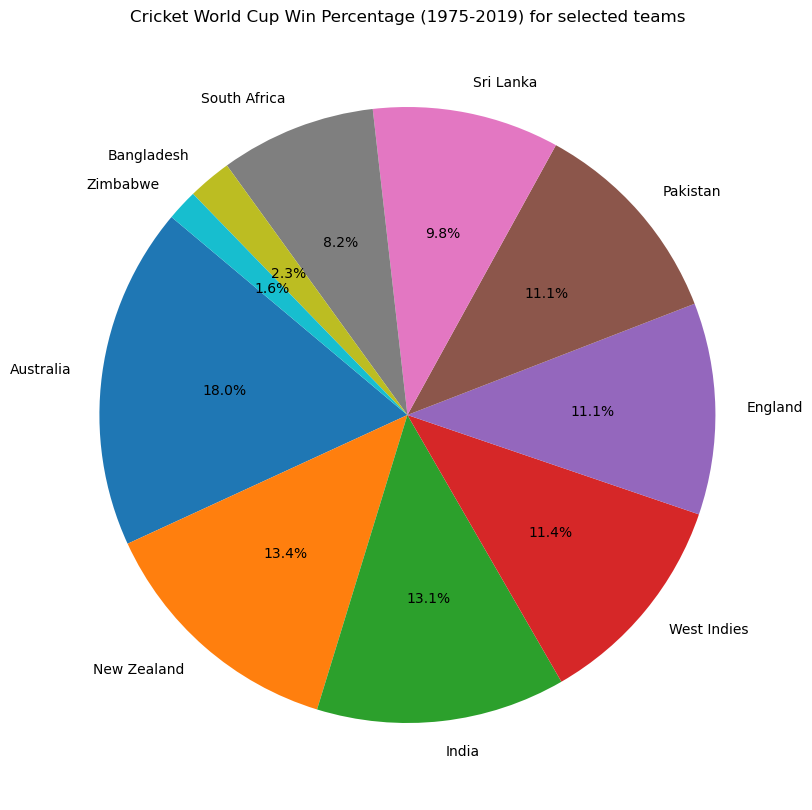

In [22]:
df = pd.read_csv('worldcup.csv')
included_teams = ['Australia', 'India', 'England', 'Pakistan', 'South Africa', 'New Zealand', 'Sri Lanka', 'Bangladesh', 'Zimbabwe', 'West Indies']
filtered_df = df[df[['team_1', 'team_2']].isin(included_teams).all(axis=1)]
team_wins = pd.DataFrame(index=pd.concat([filtered_df['team_1'], filtered_df['team_2']]).unique(), columns=['Wins'], data=0)

for index, row in filtered_df.iterrows():
    winner = row['winner']
    team_wins.loc[row['team_1'], 'Wins'] += 1 if winner == row['team_1'] else 0
    team_wins.loc[row['team_2'], 'Wins'] += 1 if winner == row['team_2'] else 0

team_wins['Win Percentage'] = (team_wins['Wins'] / team_wins['Wins'].sum()) * 100
team_wins = team_wins.sort_values(by='Win Percentage', ascending=False)

plt.figure(figsize=(10, 10))
plt.pie(team_wins['Win Percentage'], labels=team_wins.index, autopct='%1.1f%%', startangle=140)
plt.title('Cricket World Cup Win Percentage (1975-2019) for selected teams')
plt.show()

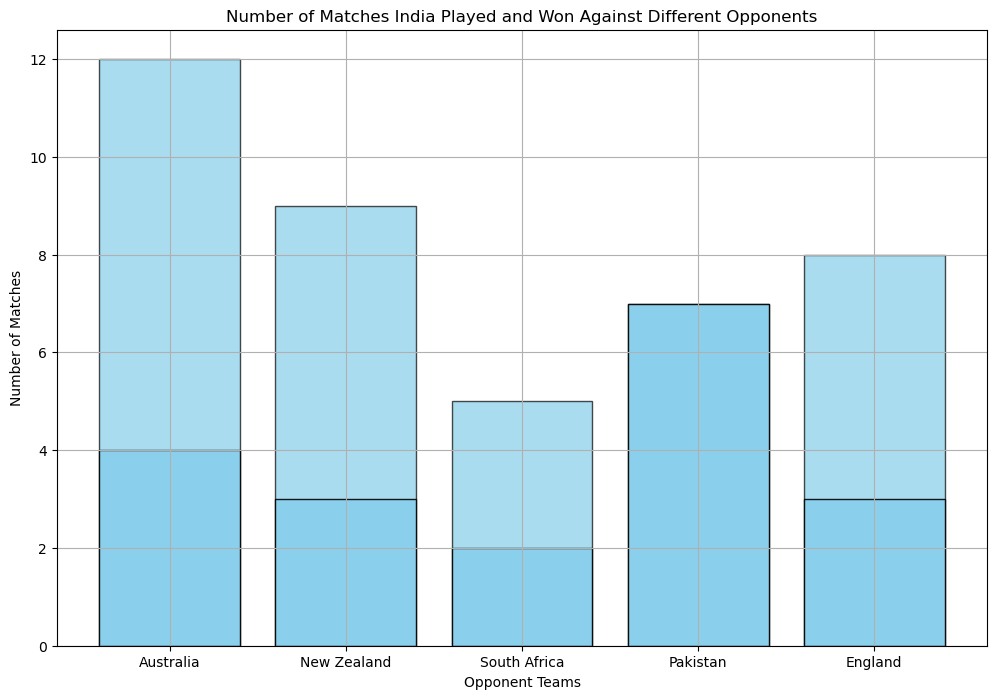

In [23]:
opponent_teams = ['Australia', 'New Zealand', 'South Africa', 'Pakistan', 'England']
bar_color = 'skyblue'

plt.figure(figsize=(12, 8))
for opponent_team in opponent_teams:
    
    matches_involving_india = df_sorted[
        ((df_sorted['team_1'] == 'India') & (df_sorted['team_2'] == opponent_team)) |
        ((df_sorted['team_2'] == 'India') & (df_sorted['team_1'] == opponent_team))
    ]
    total_matches = len(matches_involving_india)
    wins_by_india = matches_involving_india['winner'].eq('India').sum()
    plt.bar(opponent_team, total_matches, label=f'Total Matches (India vs {opponent_team})', alpha=0.7, color=bar_color, edgecolor='black')
    plt.bar(opponent_team, wins_by_india, label=f'Matches Won by India', alpha=0.9, color=bar_color, edgecolor='black')

plt.title('Number of Matches India Played and Won Against Different Opponents')
plt.xlabel('Opponent Teams')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.show()

Let's see the Distribution of India winnning per year from 1975-2019

/var/folders/s0/rbvmdt111zb6_2fzwpdjlgbc0000gn/T/ipykernel_7356/115686640.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


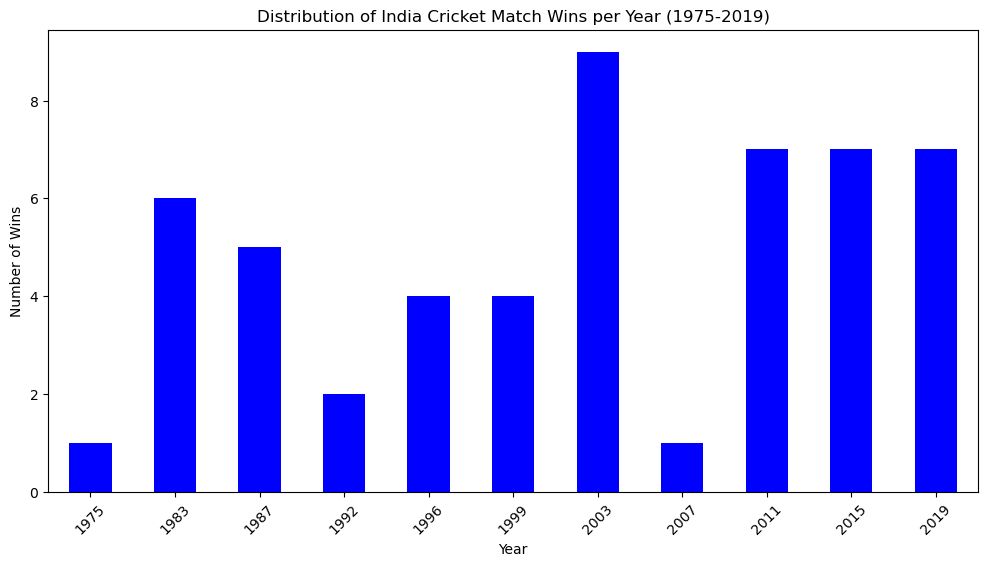

In [24]:
df = pd.read_csv('worldcup.csv')
df['date'] = pd.to_datetime(df['date'])

df_india = df[df['winner'] == 'India']
df_india_period = df_india[(df_india['date'].dt.year >= 1975) & (df_india['date'].dt.year <= 2019)]

india_wins_per_year = df_india_period['date'].dt.year.value_counts().sort_index()


plt.figure(figsize=(12, 6))
india_wins_per_year.plot(kind='bar', color='blue')
plt.title('Distribution of India Cricket Match Wins per Year (1975-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

Let's calculate the probability of India winning over the years

/var/folders/s0/rbvmdt111zb6_2fzwpdjlgbc0000gn/T/ipykernel_7356/3872271213.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


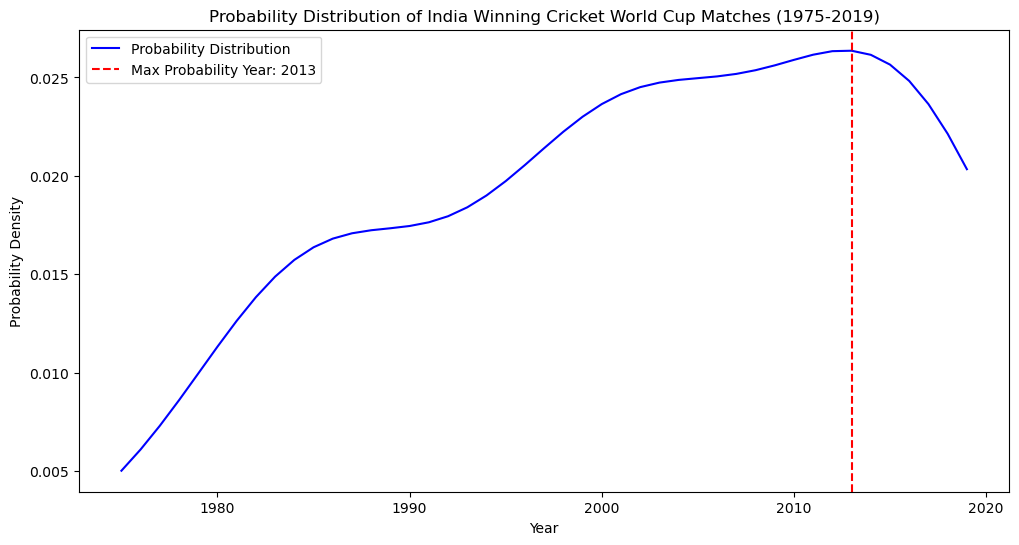

The year with the highest probability of India winning was: 2013


In [25]:
from scipy.stats import gaussian_kde

df = pd.read_csv('worldcup.csv')
df['date'] = pd.to_datetime(df['date'])

df_india = df[df['winner'] == 'India']
df_india_period = df_india[(df_india['date'].dt.year >= 1975) & (df_india['date'].dt.year <= 2019)]

years = df_india_period['date'].dt.year
kde = gaussian_kde(years)

year_range = range(1975, 2020)
probability_distribution = kde(year_range)

max_prob_year = year_range[probability_distribution.argmax()]

plt.figure(figsize=(12, 6))
plt.plot(year_range, probability_distribution, label='Probability Distribution', color='blue')
plt.title('Probability Distribution of India Winning Cricket World Cup Matches (1975-2019)')
plt.xlabel('Year')
plt.ylabel('Probability Density')
plt.axvline(x=max_prob_year, color='red', linestyle='--', label=f'Max Probability Year: {max_prob_year}')
plt.legend()
plt.show()

print(f"The year with the highest probability of India winning was: {max_prob_year}")

/var/folders/s0/rbvmdt111zb6_2fzwpdjlgbc0000gn/T/ipykernel_7356/2890860071.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


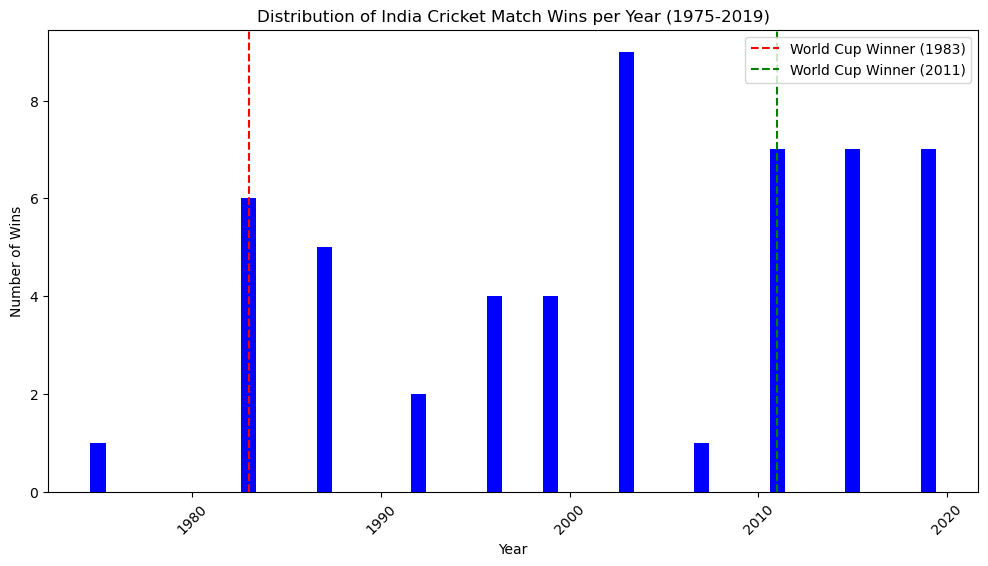

In [26]:
df = pd.read_csv('worldcup.csv')
df['date'] = pd.to_datetime(df['date'])

df_india = df[df['winner'] == 'India']
df_india_period = df_india[(df_india['date'].dt.year >= 1975) & (df_india['date'].dt.year <= 2019)]

india_wins_per_year = df_india_period['date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.bar(india_wins_per_year.index, india_wins_per_year, color='blue')
plt.axvline(x=1983, color='red', linestyle='--', label='World Cup Winner (1983)')
plt.axvline(x=2011, color='green', linestyle='--', label='World Cup Winner (2011)')
plt.title('Distribution of India Cricket Match Wins per Year (1975-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Let's see the performance of team over the years

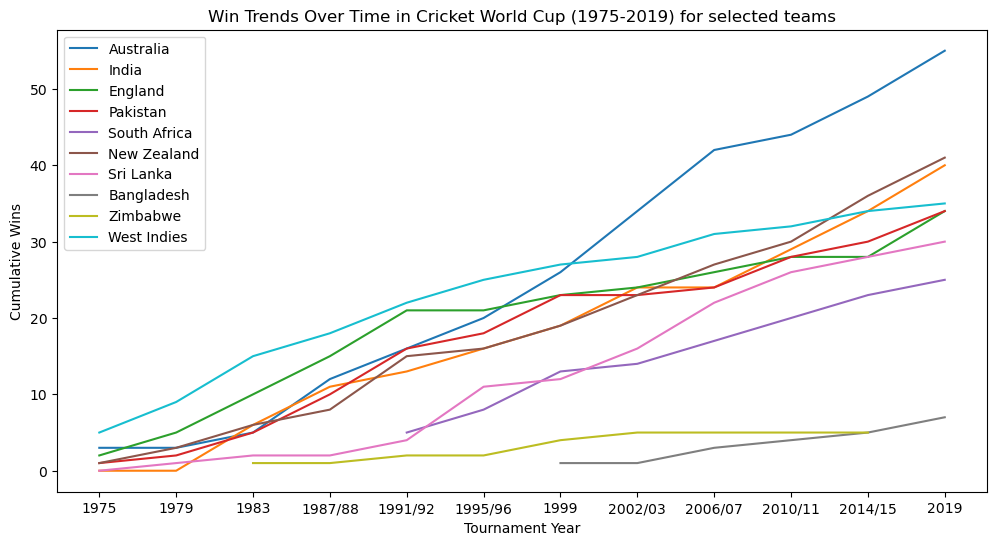

In [27]:
plt.figure(figsize=(12, 6))
for team in included_teams:
    team_data = filtered_df[(filtered_df['team_1'].isin([team])) | (filtered_df['team_2'].isin([team]))]
    team_wins_over_time = team_data.groupby('season')['winner'].apply(lambda x: (x == team).sum()).cumsum()
    plt.plot(team_wins_over_time.index, team_wins_over_time, label=team)

plt.title('Win Trends Over Time in Cricket World Cup (1975-2019) for selected teams')
plt.xlabel('Tournament Year')
plt.ylabel('Cumulative Wins')
plt.legend()
plt.show()

Let's calculate which team dominated in a particular host country and plot a heat map

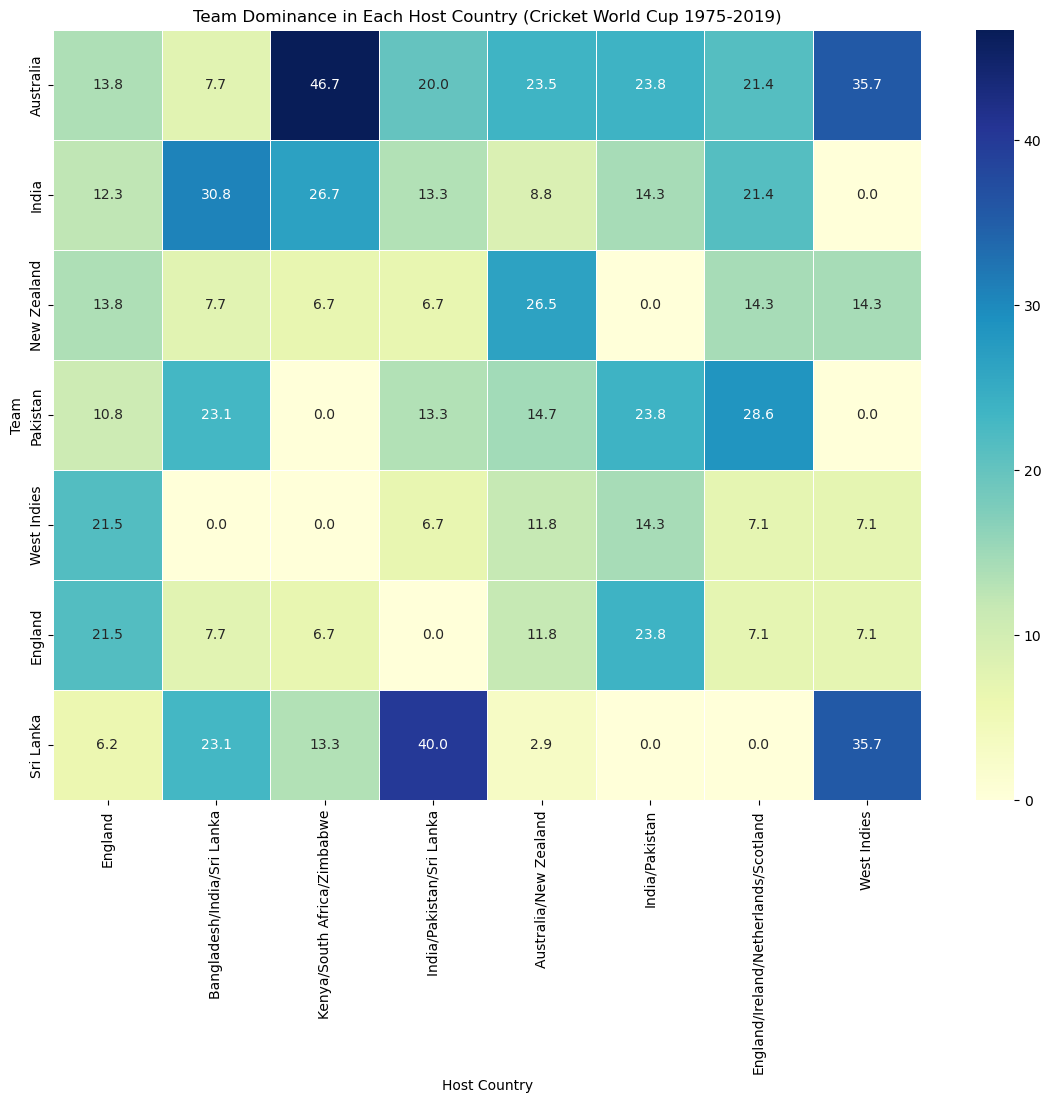

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('worldcup.csv')

included_teams = ['Australia', 'India', 'New Zealand', 'Pakistan', 'West Indies', 'England', 'Sri Lanka']
filtered_df = df[df[['team_1', 'team_2']].isin(included_teams).all(axis=1)]
team_wins_by_host = pd.DataFrame(index=included_teams, columns=pd.unique(filtered_df['host']), data=0)

for index, row in filtered_df.iterrows():
    winner = row['winner']
    host_country = row['host']
    team_wins_by_host.loc[row['team_1'], host_country] += 1 if winner == row['team_1'] else 0
    team_wins_by_host.loc[row['team_2'], host_country] += 1 if winner == row['team_2'] else 0
    
team_win_percentages_by_host = team_wins_by_host.div(team_wins_by_host.sum(axis=0), axis=1) * 100

plt.figure(figsize=(14, 10))
sns.heatmap(team_win_percentages_by_host, cmap='YlGnBu', annot=True, fmt='.1f', linewidths=.5)
plt.title('Team Dominance in Each Host Country (Cricket World Cup 1975-2019)')
plt.xlabel('Host Country')
plt.ylabel('Team')
plt.show()

Let's calculate which team has won most number of ODI World Cup

The top five teams with the most World Cup titles from 1975 to 2019 (excluding tied matches) are:
winner
Australia      5
West Indies    2
India          2
Pakistan       1
Sri Lanka      1
Name: count, dtype: int64


/var/folders/s0/rbvmdt111zb6_2fzwpdjlgbc0000gn/T/ipykernel_7356/3382495102.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


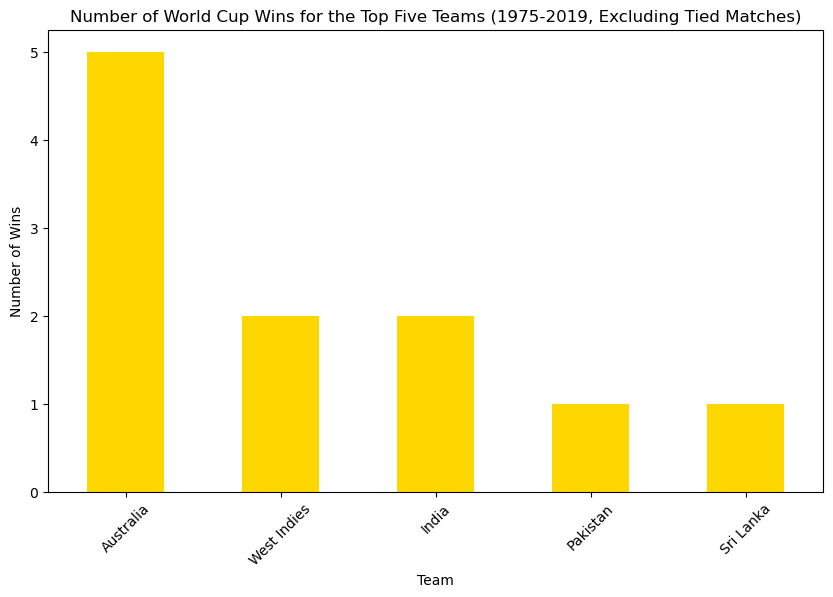

In [29]:
df = pd.read_csv('worldcup.csv')
df['date'] = pd.to_datetime(df['date'])

world_cup_df = df[(df['date'].dt.year >= 1975) & (df['date'].dt.year <= 2019)]
world_cup_winners = world_cup_df.groupby('season')['winner'].last()
win_counts = world_cup_winners.value_counts()
top_five_teams = win_counts.head(5)

print(f"The top five teams with the most World Cup titles from 1975 to 2019 (excluding tied matches) are:\n{top_five_teams}")

plt.figure(figsize=(10, 6))
top_five_teams.plot(kind='bar', color='gold')
plt.title('Number of World Cup Wins for the Top Five Teams (1975-2019, Excluding Tied Matches)')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.show()

Now let's see which team wins, by defending ro by chasing

<!-- Now let's see how which team wins,by defending or by chasing -->

/var/folders/s0/rbvmdt111zb6_2fzwpdjlgbc0000gn/T/ipykernel_7356/3496272079.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['winning_action'] = df_filtered.apply(lambda row: 'Chasing' if row['margin_type'] == 'wickets' else 'Defending', axis=1)


<Figure size 1200x600 with 0 Axes>

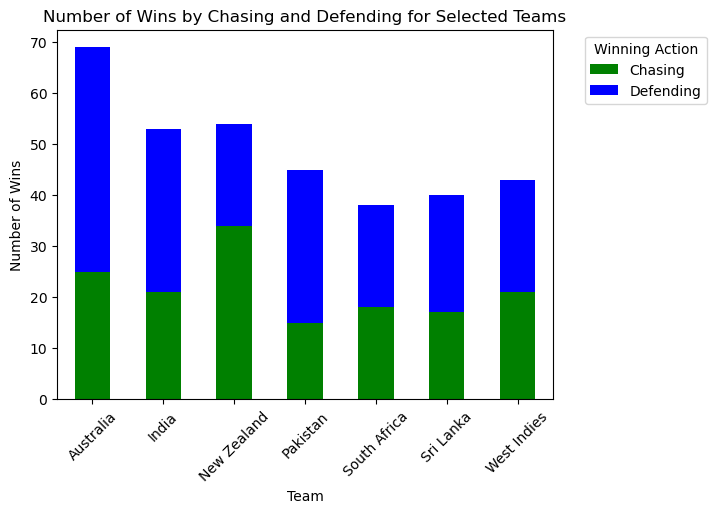

In [30]:
df = pd.read_csv('worldcup.csv')
df_with_winner = df.dropna(subset=['winner'])

included_teams = ['India', 'Australia', 'New Zealand', 'Pakistan', 'Sri Lanka', 'West Indies', 'South Africa']

df_filtered = df_with_winner[df_with_winner['winner'].isin(included_teams)]
df_filtered['winning_action'] = df_filtered.apply(lambda row: 'Chasing' if row['margin_type'] == 'wickets' else 'Defending', axis=1)
winning_action_counts = df_filtered.groupby(['winner', 'winning_action']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
winning_action_counts.plot(kind='bar', stacked=True, color=['green', 'blue'])
plt.title('Number of Wins by Chasing and Defending for Selected Teams')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend(title='Winning Action', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

![Loading GIF](FinalImages/guilty.gif)

## Hypothesis Testing

In [31]:
import numpy as np

# Calculating the mean, variance, and standard deviation of India's winning percentages
winning_percentages_values = list(winning_percentages.values())

mean_winning_percentage = np.mean(winning_percentages_values)
variance_winning_percentage = np.var(winning_percentages_values)
std_dev_winning_percentage = np.std(winning_percentages_values)

mean_winning_percentage, variance_winning_percentage, std_dev_winning_percentage

(62.623456790123456, 837.0560890108216, 28.93192162665352)

![Loading img](FinalImages/GTASA.gif )

In [32]:
df_sorted['date'] = pd.to_datetime(df_sorted['date'])

date_range = df_sorted['date'].agg(['min', 'max'])
date_range

min   1975-06-07
max   2019-07-14
Name: date, dtype: datetime64[ns]

In [33]:
# Calculate the exact midpoint date
midpoint_date_exact = date_range['min'] + (date_range['max'] - date_range['min']) / 2

time_period_1 = (date_range['min'], midpoint_date_exact)
time_period_2 = (midpoint_date_exact, date_range['max'])

time_period_1, time_period_2

((Timestamp('1975-06-07 00:00:00'), Timestamp('1997-06-25 00:00:00')),
 (Timestamp('1997-06-25 00:00:00'), Timestamp('2019-07-14 00:00:00')))

### Now the reason behind using the midpoint date is to divide the dataset into two equal parts 
### 1.1975 - 1997
### 2.1997 - 2019


### Now, Lets conduct Hypothesis Test for Australia and England and see if there is any difference in India's performance over the two time periods. 

In [34]:
import pandas as pd
from scipy.stats import ttest_ind

india_matches['date'] = pd.to_datetime(india_matches['date'])

midpoint_date = date_range['min'] + (date_range['max'] - date_range['min']) / 2

# t-test for a team
def perform_ttest(team):
    # Filtering Matches
    matches_vs_team = india_matches[(india_matches['team_1'] == team) | (india_matches['team_2'] == team)]
    
    matches_vs_team['date'] = pd.to_datetime(matches_vs_team['date'])
    
    # Split the data into two periods
    early_period = matches_vs_team[matches_vs_team['date'] <= midpoint_date]
    later_period = matches_vs_team[matches_vs_team['date'] > midpoint_date]
    
    early_wins = (early_period['winner'] == 'India').astype(int)
    later_wins = (later_period['winner'] == 'India').astype(int)
    
    t_stat, p_value = ttest_ind(early_wins, later_wins, equal_var=False, nan_policy='omit')
    
    return t_stat, p_value

ttest_results = {
    'Australia': perform_ttest('Australia'),
    'England': perform_ttest('England')
}

print(ttest_results)

{'Australia': (0.0, 1.0), 'England': (-0.6546536707079772, 0.5374403444266738)}


/var/folders/s0/rbvmdt111zb6_2fzwpdjlgbc0000gn/T/ipykernel_7356/331990886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_matches['date'] = pd.to_datetime(india_matches['date'])
/var/folders/s0/rbvmdt111zb6_2fzwpdjlgbc0000gn/T/ipykernel_7356/331990886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_vs_team['date'] = pd.to_datetime(matches_vs_team['date'])
/var/folders/s0/rbvmdt111zb6_2fzwpdjlgbc0000gn/T/ipykernel_7356/331990886.py:13: SettingWithCopyWarning: 
A value is trying to be s

### Australia: The p-value is 1.0, which is much higher than the significance level of 0.05. This indicates that there is no statistically significant change in India's performance against Australia over the two time periods.

### England: The p-value is approximately 0.5374, also much higher than 0.05. This suggests that there is no statistically significant change in India's performance against England over time.

In [35]:
# Perform t-test for India's performance against New Zealand
ttest_result_new_zealand = perform_ttest('New Zealand')

ttest_result_new_zealand

/var/folders/s0/rbvmdt111zb6_2fzwpdjlgbc0000gn/T/ipykernel_7356/331990886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_vs_team['date'] = pd.to_datetime(matches_vs_team['date'])


(0.4285714285714286, 0.6814552801280138)

### New Zealand: The p-value is 0.6814, which is much higher than the significance level of 0.05. This indicates that there is no statistically significant change in India's performance against New Zealand over the two time periods.

In [36]:
# Perform t-test for India's performance against Sri Lanka
ttest_result_sri_lanka = perform_ttest('Sri Lanka')

ttest_result_sri_lanka

/var/folders/s0/rbvmdt111zb6_2fzwpdjlgbc0000gn/T/ipykernel_7356/331990886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matches_vs_team['date'] = pd.to_datetime(matches_vs_team['date'])


(-4.0, 0.01613008990009254)

### Sri Lanka: The p-value is 0.6814, which is much higher than the significance level of 0.05. This indicates that there is no statistically significant change in India's performance against Sri Lanka over the two time periods.

### Winning the World Cup in 2011 is quite the proof I guess

<img src="FinalImages/msdKoyal.gif" width = 400>

### Here comes the interesting part !!!!!!!!!!

### Now, we will switch to a different dataset because we believe that relying solely on World Cup data won't yield the necessary probabilities.


### MONTE CARLO SIMULATION

### Utilizing Monte Carlo Simulation involves implementing and calculating the winning percentage of a team at a specific ground/venue. In the game of cricket, the location of the match significantly influences outcomes, as some teams perform better on certain grounds

In [37]:
odi_data = pd.read_csv('ODI.csv')

### Venue = Chennai

### 1. India vs Australia

In [38]:

# Filter matches played by India at Chennai
india_chennai = odi_data[(odi_data['Team_1'] == 'India') | (odi_data['Team_2'] == 'India')]
india_chennai = india_chennai[india_chennai['Ground'] == 'Chennai']

# Filter matches played by Australia at Chennai
australia_chennai = odi_data[(odi_data['Team_1'] == 'Australia') | (odi_data['Team_2'] == 'Australia')]
australia_chennai = australia_chennai[australia_chennai['Ground'] == 'Chennai']

# Calculate winning percentages
win_percent_india_chennai = len(india_chennai[india_chennai['Winner'] == 'India']) / len(india_chennai) if len(india_chennai) > 0 else 0
win_percent_australia_chennai = len(australia_chennai[australia_chennai['Winner'] == 'Australia']) / len(australia_chennai) if len(australia_chennai) > 0 else 0


In [39]:
import numpy as np
from tqdm import tqdm

num_simulations = 1000000

# Use tqdm for progress bar
with tqdm(total=num_simulations, desc="Simulating Matches", unit="simulation") as pbar:
    outcomes_chennai = np.random.rand(num_simulations)

    india_wins_chennai = np.sum(outcomes_chennai < win_percent_india_chennai)
    australia_wins_chennai = np.sum((outcomes_chennai >= win_percent_india_chennai) & (outcomes_chennai < win_percent_india_chennai + win_percent_australia_chennai))
    draws_no_result_chennai = num_simulations - india_wins_chennai - australia_wins_chennai

    prob_india_winning_chennai = india_wins_chennai / num_simulations
    prob_australia_winning_chennai = australia_wins_chennai / num_simulations
    prob_draw_no_result_chennai = draws_no_result_chennai / num_simulations

    pbar.update(num_simulations)

prob_india_winning_chennai, prob_australia_winning_chennai, prob_draw_no_result_chennai

Simulating Matches: 100%|█| 1000000/1000000 [00:00<00:00, 101350860.24simulation


(0.500121, 0.499879, 0.0)

### "This concludes that the winning probabilities of India and Australia at the particular ground, Chennai, were close to 50-50. But, as we all know, who won that match?

### It was Team India."








### Now lets consider India vs Sri lanka match that was held in Mumbai (Venue = Wankhede Stadium)

In [40]:
# Filter matches played by India at Wankhede Stadium
india_wankhede = odi_data[(odi_data['Team_1'] == 'India') | (odi_data['Team_2'] == 'India')]
india_wankhede = india_wankhede[india_wankhede['Ground'] == 'Wankhede']

# Filter matches played by Sri Lanka at Wankhede Stadium
sri_lanka_wankhede = odi_data[(odi_data['Team_1'] == 'Sri Lanka') | (odi_data['Team_2'] == 'Sri Lanka')]
sri_lanka_wankhede = sri_lanka_wankhede[sri_lanka_wankhede['Ground'] == 'Wankhede']

# Calculate winning percentages
win_percent_india_wankhede = len(india_wankhede[india_wankhede['Winner'] == 'India']) / len(india_wankhede) if len(india_wankhede) > 0 else 0
win_percent_sri_lanka_wankhede = len(sri_lanka_wankhede[sri_lanka_wankhede['Winner'] == 'Sri Lanka']) / len(sri_lanka_wankhede) if len(sri_lanka_wankhede) > 0 else 0



In [41]:
with tqdm(total=num_simulations, desc="Simulating Matches at Wankhede", unit="simulation") as pbar:
    india_wins_wankhede = np.sum(np.random.rand(num_simulations) < win_percent_india_wankhede)
    sri_lanka_wins_wankhede = np.sum(np.random.rand(num_simulations) < win_percent_sri_lanka_wankhede)
    draws_no_result_wankhede = num_simulations - india_wins_wankhede - sri_lanka_wins_wankhede

    prob_india_winning_wankhede = india_wins_wankhede / num_simulations
    prob_sri_lanka_winning_wankhede = sri_lanka_wins_wankhede / num_simulations
    prob_draw_no_result_wankhede = draws_no_result_wankhede / num_simulations

    pbar.update(num_simulations)

prob_india_winning_wankhede, prob_sri_lanka_winning_wankhede, prob_draw_no_result_wankhede


Simulating Matches at Wankhede: 100%|█| 1000000/1000000 [00:00<00:00, 45035153.6


(0.550371, 0.400733, 0.048896)

### Here the clear winner is India based on the probability, and guess who won the match?????

### INDIA


### India vs South Africa in Kolkata (Venue = Eden Gardens)

In [42]:

india_eden_gardens = odi_data[(odi_data['Team_1'] == 'India') | (odi_data['Team_2'] == 'India')]
india_eden_gardens = india_eden_gardens[india_eden_gardens['Ground'] == 'Eden Gardens']


south_africa_eden_gardens = odi_data[(odi_data['Team_1'] == 'South Africa') | (odi_data['Team_2'] == 'South Africa')]
south_africa_eden_gardens = south_africa_eden_gardens[south_africa_eden_gardens['Ground'] == 'Eden Gardens']


win_percent_india_eden_gardens = len(india_eden_gardens[india_eden_gardens['Winner'] == 'India']) / len(india_eden_gardens) if len(india_eden_gardens) > 0 else 0
win_percent_south_africa_eden_gardens = len(south_africa_eden_gardens[south_africa_eden_gardens['Winner'] == 'South Africa']) / len(south_africa_eden_gardens) if len(south_africa_eden_gardens) > 0 else 0




In [43]:
with tqdm(total=num_simulations, desc="Simulating Matches at Eden Gardens", unit="simulation") as pbar:
    india_wins_eden_gardens = np.sum(np.random.rand(num_simulations) < win_percent_india_eden_gardens)
    south_africa_wins_eden_gardens = np.sum(np.random.rand(num_simulations) < win_percent_south_africa_eden_gardens)
    draws_no_result_eden_gardens = num_simulations - india_wins_eden_gardens - south_africa_wins_eden_gardens

    # Ensure that draws_no_result_eden_gardens is non-negative
    if draws_no_result_eden_gardens < 0:
        draws_no_result_eden_gardens = 0

    prob_india_winning_eden_gardens = india_wins_eden_gardens / num_simulations
    prob_south_africa_winning_eden_gardens = south_africa_wins_eden_gardens / num_simulations
    prob_draw_no_result_eden_gardens = draws_no_result_eden_gardens / num_simulations

    pbar.update(num_simulations)

prob_india_winning_eden_gardens, prob_south_africa_winning_eden_gardens, prob_draw_no_result_eden_gardens


Simulating Matches at Eden Gardens: 100%|█| 1000000/1000000 [00:00<00:00, 432095


(0.590752, 0.499995, 0.0)

### Once again, India wins the match, this time by a narrow margin.

### Now the real fun begins !!!!
### What if the worldcup that was held in India was held in another country such as Australia

### India vs Australia in Australia (Venue = Melbourne)


<img src="FinalImages/INDvAUS.png" width = 700>

In [44]:

india_melbourne = odi_data[(odi_data['Team_1'] == 'India') | (odi_data['Team_2'] == 'India')]
india_melbourne = india_melbourne[india_melbourne['Ground'] == 'Melbourne']


australia_melbourne = odi_data[(odi_data['Team_1'] == 'Australia') | (odi_data['Team_2'] == 'Australia')]
australia_melbourne = australia_melbourne[australia_melbourne['Ground'] == 'Melbourne']


win_percent_india_melbourne = len(india_melbourne[india_melbourne['Winner'] == 'India']) / len(india_melbourne) if len(india_melbourne) > 0 else 0
win_percent_australia_melbourne = len(australia_melbourne[australia_melbourne['Winner'] == 'Australia']) / len(australia_melbourne) if len(australia_melbourne) > 0 else 0





In [45]:

with tqdm(total=num_simulations, desc="Simulating Matches at Melbourne", unit="simulation") as pbar:
    outcomes_melbourne = np.random.rand(num_simulations)

    india_wins_melbourne = np.sum(outcomes_melbourne < win_percent_india_melbourne)
    australia_wins_melbourne = np.sum((outcomes_melbourne >= win_percent_india_melbourne) & 
                                      (outcomes_melbourne < win_percent_india_melbourne + win_percent_australia_melbourne))
    draws_no_result_melbourne = num_simulations - india_wins_melbourne - australia_wins_melbourne

    prob_india_winning_melbourne = india_wins_melbourne / num_simulations
    prob_australia_winning_melbourne = australia_wins_melbourne / num_simulations
    prob_draw_no_result_melbourne = draws_no_result_melbourne / num_simulations

    pbar.update(num_simulations)

prob_india_winning_melbourne, prob_australia_winning_melbourne, prob_draw_no_result_melbourne

Simulating Matches at Melbourne: 100%|█| 1000000/1000000 [00:00<00:00, 59315307.


(0.499495, 0.500505, 0.0)

### The competition between India Vs Australia remains neck to neck .

### Let's consider the same matchup as earlier, India vs. Sri Lanka, but this time at the venue in Sydney

In [46]:

india_sydney = odi_data[(odi_data['Team_1'] == 'India') | (odi_data['Team_2'] == 'India')]
india_sydney = india_sydney[india_sydney['Ground'] == 'Sydney']


sri_lanka_sydney = odi_data[(odi_data['Team_1'] == 'Sri Lanka') | (odi_data['Team_2'] == 'Sri Lanka')]
sri_lanka_sydney = sri_lanka_sydney[sri_lanka_sydney['Ground'] == 'Sydney']


win_percent_india_sydney = len(india_sydney[india_sydney['Winner'] == 'India']) / len(india_sydney) if len(india_sydney) > 0 else 0
win_percent_sri_lanka_sydney = len(sri_lanka_sydney[sri_lanka_sydney['Winner'] == 'Sri Lanka']) / len(sri_lanka_sydney) if len(sri_lanka_sydney) > 0 else 0





In [47]:
with tqdm(total=num_simulations, desc="Simulating Matches at Sydney", unit="simulation") as pbar:
    india_wins_sydney = np.sum(np.random.rand(num_simulations) < win_percent_india_sydney)
    sri_lanka_wins_sydney = np.sum(np.random.rand(num_simulations) < win_percent_sri_lanka_sydney)
    draws_no_result_sydney = num_simulations - india_wins_sydney - sri_lanka_wins_sydney

    prob_india_winning_sydney = india_wins_sydney / num_simulations
    prob_sri_lanka_winning_sydney = sri_lanka_wins_sydney / num_simulations
    prob_draw_no_result_sydney = draws_no_result_sydney / num_simulations

    pbar.update(num_simulations)

prob_india_winning_sydney, prob_sri_lanka_winning_sydney, prob_draw_no_result_sydney






Simulating Matches at Sydney: 100%|█| 1000000/1000000 [00:00<00:00, 44255383.80s


(0.226228, 0.31539, 0.458382)

### Sri lanka Won

### India vs England ( Venue = The Oval )

<img src="FinalImages/EnglandOval.jpg" width = 600>

In [48]:

india_the_oval = odi_data[(odi_data['Team_1'] == 'India') | (odi_data['Team_2'] == 'India')]
india_the_oval = india_the_oval[india_the_oval['Ground'] == 'The Oval']

england_the_oval = odi_data[(odi_data['Team_1'] == 'England') | (odi_data['Team_2'] == 'England')]
england_the_oval = england_the_oval[england_the_oval['Ground'] == 'The Oval']


win_percent_india_the_oval = len(india_the_oval[india_the_oval['Winner'] == 'India']) / len(india_the_oval) if len(india_the_oval) > 0 else 0
win_percent_england_the_oval = len(england_the_oval[england_the_oval['Winner'] == 'England']) / len(england_the_oval) if len(england_the_oval) > 0 else 0





In [49]:

with tqdm(total=num_simulations, desc="Simulating Matches at The Oval", unit="simulation") as pbar:
    outcomes_the_oval = np.random.rand(num_simulations)

    india_wins_the_oval = np.sum(outcomes_the_oval < win_percent_india_the_oval)
    england_wins_the_oval = np.sum((outcomes_the_oval >= win_percent_india_the_oval) & 
                                    (outcomes_the_oval < win_percent_india_the_oval + win_percent_england_the_oval))
    draws_no_result_the_oval = num_simulations - india_wins_the_oval - england_wins_the_oval

    prob_india_winning_the_oval = india_wins_the_oval / num_simulations
    prob_england_winning_the_oval = england_wins_the_oval / num_simulations
    prob_draw_no_result_the_oval = draws_no_result_the_oval / num_simulations

    pbar.update(num_simulations)

prob_india_winning_the_oval, prob_england_winning_the_oval, prob_draw_no_result_the_oval



Simulating Matches at The Oval: 100%|█| 1000000/1000000 [00:00<00:00, 64703947.6


(0.412047, 0.587953, 0.0)

### England wins by a narrow margin

### Let's change the venue but the match up remains the same.

### Venue = The Lords

<img src="FinalImages/SydAus.png" width = 600>


In [50]:

india_lords = odi_data[(odi_data['Team_1'] == 'India') | (odi_data['Team_2'] == 'India')]
india_lords = india_lords[india_lords['Ground'] == "Lord's"]


england_lords = odi_data[(odi_data['Team_1'] == 'England') | (odi_data['Team_2'] == 'England')]
england_lords = england_lords[england_lords['Ground'] == "Lord's"]


win_percent_india_lords = len(india_lords[india_lords['Winner'] == 'India']) / len(india_lords) if len(india_lords) > 0 else 0
win_percent_england_lords = len(england_lords[england_lords['Winner'] == 'England']) / len(england_lords) if len(england_lords) > 0 else 0





In [51]:
with tqdm(total=num_simulations, desc="Simulating Matches at Lord's", unit="simulation") as pbar:
    india_wins_lords = np.sum(np.random.rand(num_simulations) < win_percent_india_lords)
    england_wins_lords = np.sum(np.random.rand(num_simulations) < win_percent_england_lords)
    draws_no_result_lords = num_simulations - india_wins_lords - england_wins_lords

    prob_india_winning_lords = india_wins_lords / num_simulations
    prob_england_winning_lords = england_wins_lords / num_simulations
    prob_draw_no_result_lords = draws_no_result_lords / num_simulations

    pbar.update(num_simulations)

prob_india_winning_lords, prob_england_winning_lords, prob_draw_no_result_lords




Simulating Matches at Lord's: 100%|█| 1000000/1000000 [00:00<00:00, 44006505.02s


(0.444102, 0.456149, 0.099749)

### The probabilities have changed again, both the team have same chances of winning the match

### Another Intriguing match up that we have simulated based on Team Compositions of India and England

### We have selected 11 current players of each team and based on their stats which include Average, Strike Rate and many other factors we ran a simulation to find out the winning probability  

In [52]:
# Load the data from the files
file_path_batting = 'IndiaBatting.csv'
file_path_bowling = 'IndiaBowling.csv'

india_batting = pd.read_csv(file_path_batting)
india_bowling = pd.read_csv(file_path_bowling)

india_batting.head(), india_bowling.head()


(         Player       Span  Mat  Inns  NO   Runs    HS    Ave      SR 100  50  \
 0       SS Iyer  2017-2023   58    53   6   2331  128*  49.59  100.99   5  17   
 1       V Kohli  2008-2023  292   280  44  13848   183  58.67   93.58  50  72   
 2      KL Rahul  2016-2023   72    68  14   2743   112  50.79   88.14   7  17   
 3     RG Sharma  2007-2023  262   254  36  10709   264  49.12   91.97  31  55   
 4  Shubman Gill  2019-2023   44    44   7   2271   208  61.37  103.46   6  13   
 
     0  
 0   1  
 1  16  
 2   2  
 3  16  
 4   1  ,
            Player       Span  Mat  Inns  Balls  Mdns  Runs  Wkts   BBI    Ave  \
 0       JJ Bumrah  2016-2023   89    88   4580    57  3509   149  6/19  23.55   
 1       RA Jadeja  2009-2023  197   189   9750    56  7936   220  5/33  36.07   
 2   Kuldeep Yadav  2017-2023  101    98   5126    29  4319   167  6/25  25.86   
 3  Mohammed Shami  2013-2023  101   100   4985    51  4618   195  7/57  23.68   
 4  Mohammed Siraj  2019-2023   41    40 

In [53]:

selected_players = [
    "RG Sharma", "Shubman Gill", "V Kohli", "SS Iyer", 
    "KL Rahul", "SA Yadav", "Mohammed Shami", 
    "Mohammed Siraj", "RA Jadeja", "JJ Bumrah", "Kuldeep Yadav"
]

# Filter the batting and bowling data for the selected players
selected_batting_stats = india_batting[india_batting['Player'].isin(selected_players)]
selected_bowling_stats = india_bowling[india_bowling['Player'].isin(selected_players)]

selected_batting_stats, selected_bowling_stats


(         Player       Span  Mat  Inns  NO   Runs    HS    Ave      SR 100  50  \
 0       SS Iyer  2017-2023   58    53   6   2331  128*  49.59  100.99   5  17   
 1       V Kohli  2008-2023  292   280  44  13848   183  58.67   93.58  50  72   
 2      KL Rahul  2016-2023   72    68  14   2743   112  50.79   88.14   7  17   
 3     RG Sharma  2007-2023  262   254  36  10709   264  49.12   91.97  31  55   
 4  Shubman Gill  2019-2023   44    44   7   2271   208  61.37  103.46   6  13   
 5      SA Yadav  2021-2023   37    35   5    773   72*  25.76  105.02   -   4   
 
     0  
 0   1  
 1  16  
 2   2  
 3  16  
 4   1  
 5   3  ,
            Player       Span  Mat  Inns  Balls  Mdns  Runs  Wkts   BBI    Ave  \
 0       JJ Bumrah  2016-2023   89    88   4580    57  3509   149  6/19  23.55   
 1       RA Jadeja  2009-2023  197   189   9750    56  7936   220  5/33  36.07   
 2   Kuldeep Yadav  2017-2023  101    98   5126    29  4319   167  6/25  25.86   
 3  Mohammed Shami  2013-2023  1

In [54]:


combined_stats = pd.merge(selected_batting_stats, selected_bowling_stats, on='Player', how='outer')


combined_stats.fillna(0, inplace=True)

combined_stats


,Player,Span_x,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,5,10,Ct,St
0,SS Iyer,2017-2023,58.0,53.0,6.0,2331.0,128*,49.59,100.99,5,...,0.0,0.0,0,0.00,0.00,0.0,0,0,0.0,0
1,V Kohli,2008-2023,292.0,280.0,44.0,13848.0,183,58.67,93.58,50,...,0.0,0.0,0,0.00,0.00,0.0,0,0,0.0,0
2,KL Rahul,2016-2023,72.0,68.0,14.0,2743.0,112,50.79,88.14,7,...,0.0,0.0,0,0.00,0.00,0.0,0,0,0.0,0
3,RG Sharma,2007-2023,262.0,254.0,36.0,10709.0,264,49.12,91.97,31,...,0.0,0.0,0,0.00,0.00,0.0,0,0,0.0,0
4,Shubman Gill,2019-2023,44.0,44.0,7.0,2271.0,208,61.37,103.46,6,...,0.0,0.0,0,0.00,0.00,0.0,0,0,0.0,0
5,SA Yadav,2021-2023,37.0,35.0,5.0,773.0,72*,25.76,105.02,-,...,0.0,0.0,0,0.00,0.00,0.0,0,0,0.0,0
6,JJ Bumrah,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0,...,3509.0,149.0,6/19,23.55,4.59,30.7,2,-,18.0,-
7,RA Jadeja,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0,...,7936.0,220.0,5/33,36.07,4.88,44.3,2,-,74.0,-
8,Kuldeep Yadav,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0,...,4319.0,167.0,6/25,25.86,5.05,30.6,2,-,15.0,-
9,Mohammed Shami,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0,...,4618.0,195.0,7/57,23.68,5.55,25.5,5,-,31.0,-


<img src="FinalImages/INDvsENG.png" width = 600>

In [55]:
# Load England data
england_batting = pd.read_csv('EnglandBatting.csv')
england_bowling = pd.read_csv('EnglandBowling.csv')

# List of selected England players
selected_england_players = [
    "JC Buttler", "HC Brook", "JE Root", "JM Bairstow", 
    "LS Livingstone", "BA Stokes", "JC Archer", 
    "SM Curran", "MA Wood", "CR Woakes", "MM Ali"
]


selected_england_batting = england_batting[england_batting['Player'].isin(selected_england_players)]
selected_england_bowling = england_bowling[england_bowling['Player'].isin(selected_england_players)]


combined_england_stats = pd.merge(selected_england_batting, selected_england_bowling, on='Player', how='outer')
combined_england_stats.fillna(0, inplace=True)


combined_england_stats

,Player,Span_x,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,5,10,Ct,St
0,JM Bairstow,2011-2023,107.0,98.0,8.0,3868.0,141*,42.97,102.92,11,...,0.0,0.0,0,0.00,0.00,0.0,0,0,0.0,0
1,HC Brook,2023-2023,14.0,14.0,1.0,406.0,80,31.23,95.30,-,...,0.0,0.0,0,0.00,0.00,0.0,0,0,0.0,0
2,JC Buttler,2012-2023,180.0,153.0,27.0,5022.0,162*,39.85,117.14,11,...,0.0,0.0,0,0.00,0.00,0.0,0,0,0.0,0
3,LS Livingstone,2021-2023,24.0,21.0,3.0,513.0,95*,28.50,105.55,-,...,0.0,0.0,0,0.00,0.00,0.0,0,0,0.0,0
4,JE Root,2013-2023,171.0,160.0,23.0,6522.0,133*,47.60,86.77,16,...,0.0,0.0,0,0.00,0.00,0.0,0,0,0.0,0
5,BA Stokes,2011-2023,114.0,99.0,15.0,3463.0,182,41.22,95.68,5,...,3137.0,74.0,5/61,42.39,6.05,42.0,1,-,55.0,-
6,MM Ali,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0,...,5311.0,111.0,4/46,47.84,5.32,53.9,-,-,48.0,-
7,JC Archer,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0,...,913.0,42.0,6/40,21.73,4.80,27.1,1,-,6.0,-
8,SM Curran,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0,...,1301.0,33.0,5/48,39.42,6.22,37.9,1,-,9.0,-
9,CR Woakes,0,0.0,0.0,0.0,0.0,0,0.00,0.00,0,...,5193.0,173.0,6/45,30.01,5.43,33.1,3,-,50.0,-


In [56]:
import numpy as np

# Constants
MAX_OVERS = 50
MAX_BOWLERS_OVERS = 10
SIMULATIONS = 10000

# Simulating Batting Stats
def simulate_batting(batting_avg, strike_rate):
    
    if batting_avg > 0:
        innings_length = np.random.poisson(batting_avg)  # Innings length in terms of balls faced
        runs_scored = innings_length * (strike_rate / 100)
        return runs_scored
    else:
        return 0

# Simulating Bowling Stats
def simulate_bowling(bowling_avg, bowling_sr, balls_bowled):
    
    if bowling_avg > 0 and bowling_sr > 0:
        expected_wickets = balls_bowled / bowling_sr
        wickets_taken = np.random.poisson(expected_wickets)
        runs_conceded = wickets_taken * bowling_avg
        return wickets_taken, runs_conceded
    else:
        return 0, 0

# Extract relevant stats for each player
india_batting_stats = combined_stats[['Player', 'Ave_x', 'SR_x']]
india_bowling_stats = combined_stats[['Player', 'Ave_y', 'SR_y']]
england_batting_stats = combined_england_stats[['Player', 'Ave_x', 'SR_x']]
england_bowling_stats = combined_england_stats[['Player', 'Ave_y', 'SR_y']]


def simulate_innings(batting_stats, bowling_stats):
    total_runs = 0
    wickets = 0

    # Simulate batting innings
    for index, row in batting_stats.iterrows():
        runs = simulate_batting(row['Ave_x'], row['SR_x'])
        total_runs += runs
        wickets += 1
        if wickets == 10:  # All out
            break

    # Simulate bowling innings
    total_balls = MAX_OVERS * 6
    for index, row in bowling_stats.iterrows():
        balls_bowled = min(total_balls, MAX_BOWLERS_OVERS * 6)
        wickets_taken, runs_conceded = simulate_bowling(row['Ave_y'], row['SR_y'], balls_bowled)
        total_runs -= runs_conceded
        total_balls -= balls_bowled
        if total_balls <= 0:
            break

    return max(total_runs, 0)  # Total runs cannot be negative





In [57]:
for _ in tqdm(range(SIMULATIONS), desc="Simulating Matches", unit="simulation"):
    india_score = simulate_innings(india_batting_stats, england_bowling_stats)
    england_score = simulate_innings(england_batting_stats, india_bowling_stats)

    if india_score > england_score:
        india_wins += 1

# Calculate winning probability
india_win_probability = india_wins / SIMULATIONS
england_win_probability = 1 - india_win_probability

india_win_probability, england_win_probability

Simulating Matches: 100%|███████| 10000/10000 [00:06<00:00, 1536.06simulation/s]


(0.9977, 0.0022999999999999687)

So by this player composition India has a 99% winning chance over England.

In Conclusion



# Ab hum Dugna Lagaan nahi denge 


![Loading GIF](FinalImages/gatsby.gif)